# Статистический анализ для сервиса аренды самокатов GoFast

Предоставлены данные о некоторых пользователях из нескольких городов, а также об их поездках популярного сервиса аренды самокатов GoFast. Необходимо проанализировать данные и проверьте некоторые гипотезы, которые могут помочь бизнесу вырасти.
Шаг 1. Загрузка данных
Изучение общей информации о каждом датафрейме.
Шаг 2. Предобработка данных
Изменение типов данных по необходимости;
Проверка наличия пропущенных значений и дубликатов в датафреймах и их обработка.
Шаг 3. Исследовательский анализ данных
Описание и визуализация общей информации о пользователях и поездках:
1 частота встречаемости городов;
2 соотношение пользователей с подпиской и без подписки;
3 возраст пользователей;
4 расстояние, которое пользователь преодолел за одну поездку;
5 продолжительность поездок.
Шаг 4. Объединение данных
Объединение данных о пользователях, поездках и подписках в один датафрейм. Создание отдельных датафреймов в разрезе подписок.
Визуализация информации о расстоянии и времени поездок для пользователей обеих категорий.
Шаг 5. Подсчёт выручки
Создание датафрейма с агрегированными данными о поездках на основе датафрейма с объединёнными данными;
Рассчитать суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц.
Добавление столбца с помесячной выручкой, которую принёс каждый пользователь. 
Шаг 6. Проверка гипотез
Продакт-менеджеры сервиса хотят увеличить количество пользователей с подпиской. Для этого они будут проводить различные акции, но сначала нужно выяснить несколько важных моментов.
1 Важно понять, тратят ли пользователи с подпиской больше времени на поездки? Если да, то пользователи с подпиской могут быть «выгоднее» для компании. Проверить гипотезу. 
2 Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Можно ли сказать, что расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров? Проверить гипотезу.
3 Проверить гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки. 




In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy import stats as st

#### Шаг  1. Загрузка данных

In [2]:
data = pd.read_csv('/datasets/users_go.csv')
data.head(15)

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra
5,6,Регина,25,Краснодар,ultra
6,7,Игорь,23,Омск,ultra
7,8,Юрий,23,Краснодар,ultra
8,9,Ян,21,Пятигорск,ultra
9,10,Валерий,18,Екатеринбург,ultra


Знакомимся с общей информацией о файле, пропущеных значений в файле нет

In [3]:
data.info(0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,1565.0,762.633866,443.260155,1.0,378.0,762.0,1146.0,1534.0
age,1565.0,24.922045,4.553496,12.0,22.0,25.0,28.0,43.0


In [5]:
data.nunique()

user_id              1534
name                  194
age                    29
city                    8
subscription_type       2
dtype: int64

In [6]:
data_1 = pd.read_csv('/datasets/rides_go.csv')
data_1.head(15)

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28
5,1,2770.890808,16.650138,2021-10-09
6,1,3039.020292,14.927879,2021-10-19
7,1,2842.118050,23.117468,2021-11-06
8,1,3412.690668,15.238072,2021-11-14
9,1,748.690645,15.041884,2021-11-22


Знакомимся с общей информацией о файле, пропущеных значений в файле нет

In [7]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


In [8]:
data_1.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,18068.0,842.869936,434.734317,1.000000,487.000000,889.000000,1213.250000,1534.000000
distance,18068.0,3070.659976,1116.831209,0.855683,2543.226360,3133.609994,3776.222735,7211.007745
duration,18068.0,17.805011,6.091051,0.500000,13.597563,17.678395,21.724800,40.823963


In [9]:
data_1.nunique()

user_id      1534
distance    18068
duration    17974
date          364
dtype: int64

In [10]:
data_price = pd.read_csv('/datasets/subscriptions_go.csv')
data_price.head()

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


In [11]:
data_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


#### Шаг 2. Предобработка данных

Изменяем формат стобца с датой

In [12]:
data_1['date'] = pd.to_datetime(data_1['date'], format='%Y-%m-%d')
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 564.8 KB


Создаем новый столбец с номером месяца

In [13]:
data_1['month'] = pd.DatetimeIndex(data_1['date']).month
data_1

,user_id,distance,duration,date,month
0,1,4409.919140,25.599769,2021-01-01,1
1,1,2617.592153,15.816871,2021-01-18,1
2,1,754.159807,6.232113,2021-04-20,4
3,1,2694.783254,18.511000,2021-08-11,8
4,1,4028.687306,26.265803,2021-08-28,8
...,...,...,...,...,...
18063,1534,3781.098080,19.822962,2021-11-04,11
18064,1534,2840.423057,21.409799,2021-11-16,11
18065,1534,3826.185507,18.435051,2021-11-18,11
18066,1534,2902.308661,16.674362,2021-11-27,11


In [14]:
data_1['date'].max()

Timestamp('2021-12-30 00:00:00')

In [15]:
data_1['date'].min()

Timestamp('2021-01-01 00:00:00')

Проводим проверку на дубликаты

In [16]:
data.duplicated().sum()

31

In [17]:
data_1.duplicated().sum()

0

Удаляем явные дубликаты

In [18]:
data = data.drop_duplicates(subset=['user_id'], keep='first')
data = data.reset_index(drop=True)
data.duplicated().sum()

0

In [19]:
data.isnull().sum()

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64

In [20]:
data_1.isnull().sum()

user_id     0
distance    0
duration    0
date        0
month       0
dtype: int64

#### Шаг 3. Исследовательский анализ данных

Рассмотрим распределение пользователей по городам, количество пользователей в городах присутствия в предоставленной выборке достаточно однородная 

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


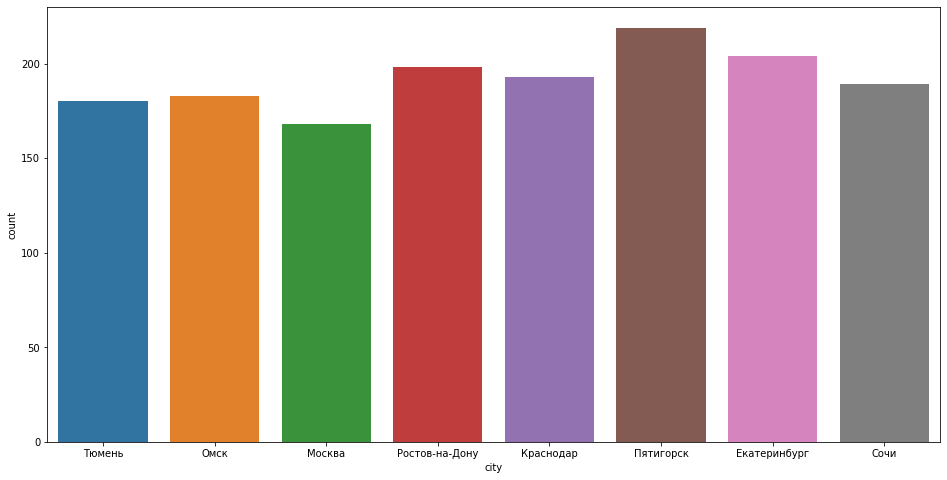

In [21]:
plt.figure(figsize=(16, 8))
sns.countplot(data['city']);


In [22]:
data_pivot=data.pivot_table(index=['city'], values=['user_id'], aggfunc=['count'])
data_pivot

,count
,user_id
city,
Екатеринбург,204
Краснодар,193
Москва,168
Омск,183
Пятигорск,219
Ростов-на-Дону,198
Сочи,189
Тюмень,180


Распределение по возрасту приближено к нормальному, медианное и среднее значение совпадают - 25 лет, значит выборка однородная без выбросов, основная часть пользователей в возрасте от 20 до 28 лет, минимальный возраст пользователя 12 лет, максимальный - 43 года.

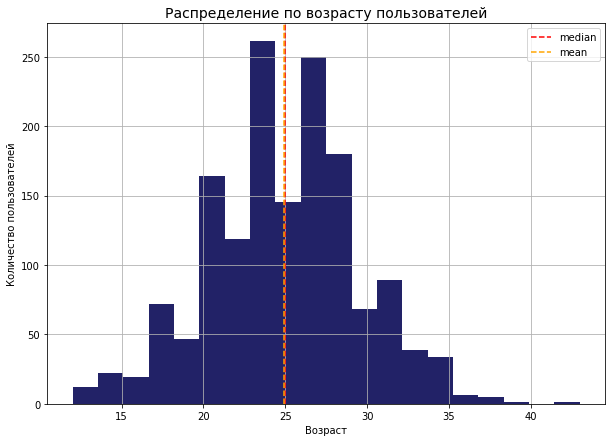

In [23]:
data['age'].hist(bins=20, color='#222267', figsize=(10,7))
plt.axvline(data['age'].median(), color='red', linestyle= '--', label='median')
plt.axvline(data['age'].mean(), color='orange', linestyle= '--', label='mean')
plt.title('Распределение по возрасту пользователей', fontsize=14)
plt.xlabel('Возраст')
plt.ylabel('Количество пользователей')
plt.legend();

Распределение по типу подписки тоже в сопоставимых для анализа объемах

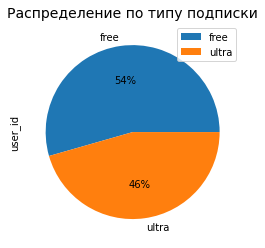

In [24]:
data.groupby(['subscription_type']).count().plot(kind='pie', y='user_id', autopct='%1.0f%%')


plt.title('Распределение по типу подписки', fontsize=14);


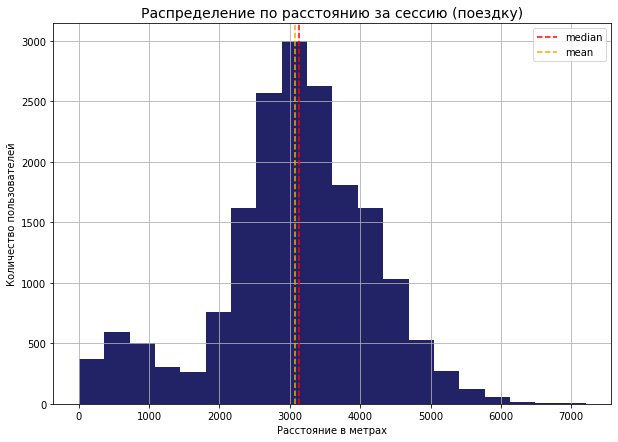

In [25]:
data_1['distance'].hist(bins=20, color='#222267', figsize=(10,7))
plt.axvline(data_1['distance'].median(), color='red', linestyle= '--', label='median')
plt.axvline(data_1['distance'].mean(), color='orange', linestyle= '--', label='mean')
plt.title('Распределение по расстоянию за сессию (поездку)', fontsize=14)
plt.xlabel('Расстояние в метрах')
plt.ylabel('Количество пользователей')
plt.legend();


Рассмотрим распределение по продолжительности сессий, распределение приближено к нормальному, продолжительность основного количества поездок  находится в диапазоне от 11 до 24 минут. Минимальное время - меньше минуты, а максимальное более 40 минут. Среднее и медиана совпадают - 17 минут.

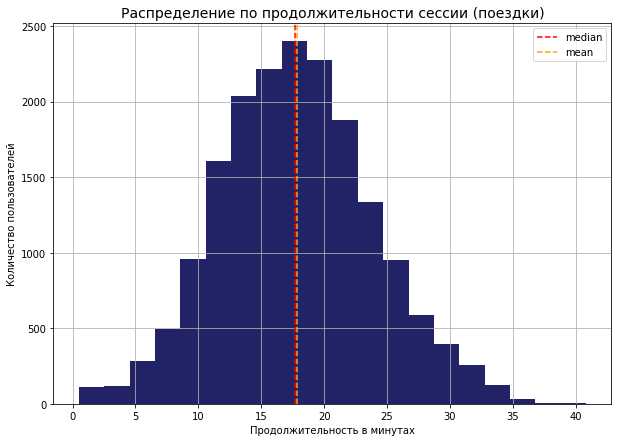

In [26]:
data_1['duration'].hist(bins=20, color='#222267', figsize=(10,7))
plt.axvline(data_1['duration'].median(), color='red', linestyle= '--', label='median')
plt.axvline(data_1['duration'].mean(), color='orange', linestyle= '--', label='mean')
plt.title('Распределение по продолжительности сессии (поездки)', fontsize=14)
plt.xlabel('Продолжительность в минутах')
plt.ylabel('Количество пользователей')
plt.legend();

<AxesSubplot:>

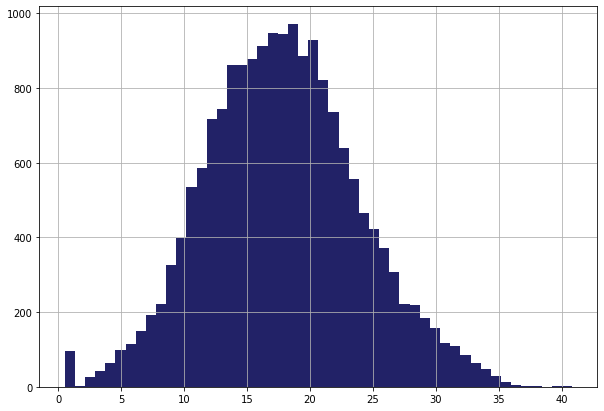

In [27]:
# Код ревьюера
data_1['duration'].hist(bins=50, color='#222267', figsize=(10,7))

#### Шаг 4. Объединение данных

Объединяем данные о пользователях и поездках

In [28]:
data_full = data.merge(data_1, on='user_id')
data_full.head(15)

,user_id,name,age,city,subscription_type,distance,duration,date,month
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8
5,1,Кира,22,Тюмень,ultra,2770.890808,16.650138,2021-10-09,10
6,1,Кира,22,Тюмень,ultra,3039.020292,14.927879,2021-10-19,10
7,1,Кира,22,Тюмень,ultra,2842.118050,23.117468,2021-11-06,11
8,1,Кира,22,Тюмень,ultra,3412.690668,15.238072,2021-11-14,11
9,1,Кира,22,Тюмень,ultra,748.690645,15.041884,2021-11-22,11


В полученный файл добавляем данные о подписках

In [29]:
data_full = data_full.merge(data_price, on='subscription_type')
data_full.head(15)

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199
5,1,Кира,22,Тюмень,ultra,2770.890808,16.650138,2021-10-09,10,6,0,199
6,1,Кира,22,Тюмень,ultra,3039.020292,14.927879,2021-10-19,10,6,0,199
7,1,Кира,22,Тюмень,ultra,2842.118050,23.117468,2021-11-06,11,6,0,199
8,1,Кира,22,Тюмень,ultra,3412.690668,15.238072,2021-11-14,11,6,0,199
9,1,Кира,22,Тюмень,ultra,748.690645,15.041884,2021-11-22,11,6,0,199


Сформируем два отдельных датафрейма в разрезе подписок

In [30]:
data_full_ultra = data_full.loc[data_full['subscription_type'] == 'ultra']

In [31]:
data_full_free = data_full.loc[data_full['subscription_type'] == 'free']

Рассмотрим сравнение распределений по возрасту, расстоянию и продолжительности поездки в разрезе подписок

In [32]:
# Код ревьюера
display(data_full.shape[0])
display(data_full_free.shape[0])
data_full_ultra.shape[0]

18068

11568

6500

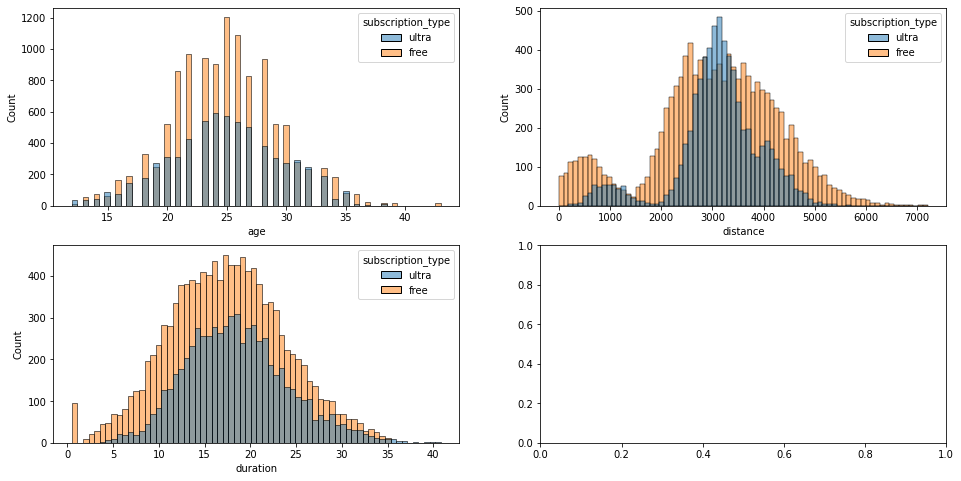

In [33]:
num_cols=['age', 'distance', 'duration']
subscription_type='subscription_type'
fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(16, 8))
for i, col in enumerate(num_cols):
    ax = axes[int(i/2), i%2]
    sns.histplot(data_full, x=col, ax=ax, hue=subscription_type)
    
    

In [34]:
data_full_pivot=data_full.pivot_table(index=['subscription_type'], values=['age', 'distance', 'duration'], aggfunc=['count', 'mean', 'median'])
data_full_pivot

count                         mean                          \
                     age distance duration        age     distance   duration   
subscription_type                                                               
free               11568    11568    11568  24.893326  3045.495282  17.390909   
ultra               6500     6500     6500  24.892615  3115.445388  18.541985   

                  median                          
                     age     distance   duration  
subscription_type                                 
free                  25  3114.648465  17.326890  
ultra                 25  3148.637229  18.178153


При сравнении распределения данных о поездках, дистанции и возраста пользователей, можно сделать следующие выводы:
    - распределения по показателям в обеих подписках похожи и приближены к нормальному
    - распределение по возрастам пользователей в категории ultra более равномерное, чем категории free, но средний возраст пользователей в обеих категориях одинаковый
    - пользователи обеих категорий в среднем проезжают примерно 3000 метров, но количество продолжительных поездок в категории free знаительно больше 

#### Шаг 5. Подсчёт выручки

Создаем датафрейм с агрегированными данными о поездках, рассчитаем суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц.

In [35]:
data_full['duration'] = np.ceil(data_full['duration'])
data_full.head()

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,26.0,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,16.0,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,7.0,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,19.0,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,27.0,2021-08-28,8,6,0,199


In [36]:
data_full_month=data_full.groupby(['user_id', 'month']).agg({'distance':'sum', 'duration':['sum', 'count'], 'subscription_type': 'first', 'minute_price':'first', 'start_ride_price':'first', 'subscription_fee':'first'})
data_full_month.head(20)

distance duration       subscription_type minute_price  \
                        sum      sum count             first        first   
user_id month                                                               
1       1       7027.511294     42.0     2             ultra            6   
        4        754.159807      7.0     1             ultra            6   
        8       6723.470560     46.0     2             ultra            6   
        10      5809.911100     32.0     2             ultra            6   
        11      7003.499363     56.0     3             ultra            6   
        12      6751.629942     28.0     2             ultra            6   
2       3      10187.723006     63.0     3             ultra            6   
        4       6164.381824     40.0     2             ultra            6   
        6       3255.338202     14.0     1             ultra            6   
        7       6780.722964     48.0     2             ultra            6   
        8        923.007439      7.0     1             ultra            6   
        10      2824.636598     19.0     1             ultra            6   
        12      3828.248580     12.0     1             ultra            6   
3       1       3061.777147     13.0     1             ultra            6   
        2       5421.152016     39.0     2             ultra            6   
        4       2956.651632     21.0     1             ultra            6   
        5       9064.026918     63.0     3             ultra            6   
        7      10919.595403     67.0     3             ultra            6   
        9       2891.012822     23.0     1             ultra            6   
        12      2593.381928     13.0     1             ultra            6   

              start_ride_price subscription_fee  
                         first            first  
user_id month                                    
1       1                    0              199  
        4                    0              199  
        8                    0              199  
        10                   0              199  
        11                   0              199  
        12                   0              199  
2       3                    0              199  
        4                    0              199  
        6                    0              199  
        7                    0              199  
        8                    0              199  
        10                   0              199  
        12                   0              199  
3       1                    0              199  
        2                    0              199  
        4                    0              199  
        5                    0              199  
        7                    0              199  
        9                    0              199  
        12                   0              199

In [37]:
data_full_month.columns = ['distance_sum', 'duration_sum', 'count_trip', 'subscription_type', 'minute_price', 'start_ride_price', 'subscription_fee' ]
data_full_month.head()

distance_sum  duration_sum  count_trip subscription_type  \
user_id month                                                             
1       1       7027.511294          42.0           2             ultra   
        4        754.159807           7.0           1             ultra   
        8       6723.470560          46.0           2             ultra   
        10      5809.911100          32.0           2             ultra   
        11      7003.499363          56.0           3             ultra   

               minute_price  start_ride_price  subscription_fee  
user_id month                                                    
1       1                 6                 0               199  
        4                 6                 0               199  
        8                 6                 0               199  
        10                6                 0               199  
        11                6                 0               199

Добавляем столбец с помесячной выручкой, которую принёс каждый пользователь.

In [38]:
data_full_month['revenue'] = data_full_month['start_ride_price']*data_full_month['count_trip']+data_full_month['minute_price']*data_full_month['duration_sum']+data_full_month['subscription_fee']

data_full_month.head(20)

distance_sum  duration_sum  count_trip subscription_type  \
user_id month                                                             
1       1       7027.511294          42.0           2             ultra   
        4        754.159807           7.0           1             ultra   
        8       6723.470560          46.0           2             ultra   
        10      5809.911100          32.0           2             ultra   
        11      7003.499363          56.0           3             ultra   
        12      6751.629942          28.0           2             ultra   
2       3      10187.723006          63.0           3             ultra   
        4       6164.381824          40.0           2             ultra   
        6       3255.338202          14.0           1             ultra   
        7       6780.722964          48.0           2             ultra   
        8        923.007439           7.0           1             ultra   
        10      2824.636598          19.0           1             ultra   
        12      3828.248580          12.0           1             ultra   
3       1       3061.777147          13.0           1             ultra   
        2       5421.152016          39.0           2             ultra   
        4       2956.651632          21.0           1             ultra   
        5       9064.026918          63.0           3             ultra   
        7      10919.595403          67.0           3             ultra   
        9       2891.012822          23.0           1             ultra   
        12      2593.381928          13.0           1             ultra   

               minute_price  start_ride_price  subscription_fee  revenue  
user_id month                                                             
1       1                 6                 0               199    451.0  
        4                 6                 0               199    241.0  
        8                 6                 0               199    475.0  
        10                6                 0               199    391.0  
        11                6                 0               199    535.0  
        12                6                 0               199    367.0  
2       3                 6                 0               199    577.0  
        4                 6                 0               199    439.0  
        6                 6                 0               199    283.0  
        7                 6                 0               199    487.0  
        8                 6                 0               199    241.0  
        10                6                 0               199    313.0  
        12                6                 0               199    271.0  
3       1                 6                 0               199    277.0  
        2                 6                 0               199    433.0  
        4                 6                 0               199    325.0  
        5                 6                 0               199    577.0  
        7                 6                 0               199    601.0  
        9                 6                 0               199    337.0  
        12                6                 0               199    277.0

In [39]:
# Код ревьюера
print(data_full_month.shape[0])

data_full_month.groupby('subscription_type')['revenue'].mean()

11331


subscription_type
free     328.641365
ultra    362.792191
Name: revenue, dtype: float64


Создан датафрейм с агрегированными данными о поездках на основе датафрейма с объединёнными данными.
Произведен расчет суммарного расстояния, количества поездок и суммарного времени для каждого пользователя за каждый месяц.
Добавлен столбец с помесячной выручкой, которую принёс каждый пользователь.

#### Шаг 6. Проверка гипотез

Проверяем гипотезу, что пользователи с подпиской тратят больше времени на поездки. 
Нулевая гипотеза: Среднее время поездки у пользователей с подпиской и без подписки одинаковое; 
Альтернативная гипотеза: Среднее время поездки у пользователей с подпиской больше, чем у пользователей без подписки

In [40]:

alpha = 0.05 

results = st.ttest_ind(
    data_full_ultra['duration'], 
    data_full_free['duration'],
    alternative='greater') 

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 1.2804098316645618e-34
Отвергаем нулевую гипотезу



По результатам статистического теста, нулевая гипотеза отвергнута, соответственно пользователи с подпиской в среднем тратят больше времени на поездку.

Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Проверим гипотезу, что расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает оптимального значения.

Нулевая гипотеза: Расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров;
Альтернативная гипотеза: Расстояние, которое проезжают пользователи с подпиской за одну поездку, превышает 3130 метров


In [41]:
optimal_value = 3130

alpha = 0.05 

results = st.ttest_1samp(
    data_full_ultra['distance'], 
    optimal_value,
    alternative='less') 

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: Расстояние, которое проезжают пользователи с подпиской за одну поездку, превышает 3130 метров')
else:
    print('Не получилось отвергнуть нулевую гипотезу: Расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров')

p-значение: 0.08046311521502146
Не получилось отвергнуть нулевую гипотезу: Расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров



По результатам статистического теста, не получилось отвергнуть нулевую гипотезу, соответственно с точки зрения износа самокатов, пользователи с подпиской обеспечивают оптимальный износ самокатов


In [42]:
data_full_month_ultra = data_full_month.loc[data_full_month['subscription_type'] == 'ultra']

In [43]:
data_full_month_free = data_full_month.loc[data_full_month['subscription_type'] == 'free']

Проверим гипотезу: выручка от пользователей с подпиской выше, чем выручка от пользователей без подписки. 
Для проверки гипотезы проведем статистический тест. Нулевая гипотеза: Среднее значение выручки у пользователей с подпиской и без подписки одинаковое; Альтернативная гипотеза: Среднее значение выручки у пользователей с подпиской больше, чем у пользователей без подписки

In [44]:
alpha = 0.05 

results = st.ttest_ind(
    data_full_month_ultra['revenue'], 
    data_full_month_free['revenue'],
    alternative='greater') 

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 1.8850394384715216e-31
Отвергаем нулевую гипотезу


По итогам статистического теста, нулевая гипотеза отвергнута, соотвественно показатели выручки от пользователей с подпиской больше, чем от пользователей без подписки

Чтобы проверить гипотезу о равенстве средних двух генеральных совокупностей для зависимых (парных) выборок в Python, применим метод scipy.stats.ttest_rel().

В результате проверок гипотез, сформированы следующие выводы:
Пользователи с подпиской в среднем тратят больше времени на поездку;
С точки зрения износа самокатов, пользователи с подпиской обеспечивают оптимальный износ самокатов;
Показатели выручки от пользователей с подпиской больше, чем от пользователей без подписки.

Итоговые выводы:
Для анализа были предоставлены данные о пользователях, их поездках и подписках за период - 2021 год. После проверки и обработки данных, исследованы данные в разрезе подписок, при сравнении распределения данных о поездках, дистанции и возраста пользователей, можно сделать следующие выводы: - распределения по показателям в обеих подписках похожи, распределение по возрастам пользователей в категории ultra более равномерное, чем категории free, но средний возраст пользователей в обеих категориях одинаковый, пользователи обеих категорий в среднем проезжают примерно 3000 метров, но количество продолжительных поездок в категории free знаительно больше. 
    Для проверки гипотез создан датафрейм с агрегированными данными о поездках на основе датафрейма с объединёнными данными. Произведен расчет суммарного расстояния, количества поездок и суммарного времени для каждого пользователя за каждый месяц, интегрирована информация с помесячной выручкой, которую принёс каждый пользователь.
    С помощью статистических тестов были проверены следующие гипотезы:
1 Тратят ли пользователи с подпиской больше времени на поездки? 
2 Можно ли сказать, что расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров?
3 Будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки. 
 
По итогам статистиеских тестов установлено, что пользователи с подпиской тратят больше времени на поездки, являются более выгодными для компании, кроме того, пользователи с подпиской, учитывая среднее время каждой поездки, обеспечивают оптимальные условия, с точки зрения износа самокатов. Проверка показателей выручки, так же показала, что пользователи с подпиской обеспечивают больший объем выручки. Проверка всех гипотез показала, что пользователи с подпиской более выгодные для компании. 
</div>